<a href="https://colab.research.google.com/github/GiovaniMicheloni/mlearning-w-python/blob/main/base_credito3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

base credito com algoritmo RandomForestClassifier

In [2]:
!pip -q install plotly
!pip -q install yellowbrick
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
basecredito = pd.read_csv('/content/credit_data.csv')

In [6]:
basecredito.loc[basecredito['age']<0, 'age'] = 40.92;

In [7]:
basecredito['age'] = basecredito['age'].fillna(basecredito['age'].mean())

In [8]:
x_credit = basecredito.iloc[:, 1:4].values
y_credit = basecredito.iloc[:, 4].values

In [10]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)
x_credit


array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

In [12]:
from sklearn.model_selection import train_test_split
xcredito_treino, xcredito_test, ycredito_treino, ycredito_test = train_test_split(x_credit, y_credit, test_size=0.15, random_state=0)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
random_forest_credit= RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_credit.fit(xcredito_treino,ycredito_treino)

RandomForestClassifier(criterion='entropy', random_state=0)

In [37]:
previsoes = random_forest_credit.predict(xcredito_test)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [38]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(ycredito_test,previsoes)

0.9866666666666667

0.9866666666666667

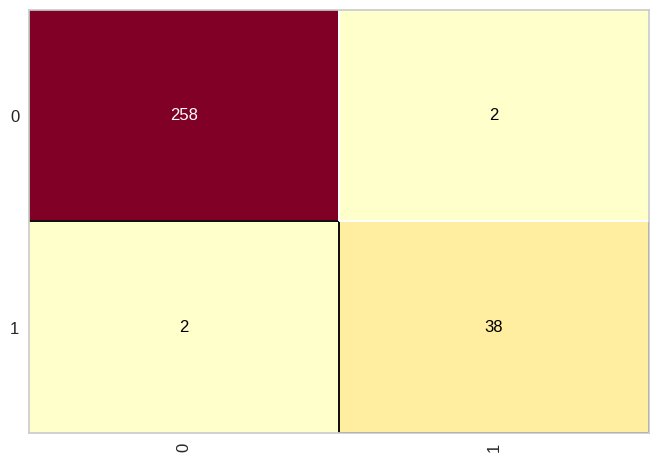

In [39]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(xcredito_treino,ycredito_treino)
cm.score(xcredito_test,ycredito_test)

In [40]:
print(classification_report(ycredito_test,previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       260
           1       0.95      0.95      0.95        40

    accuracy                           0.99       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.99      0.99      0.99       300

